In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

# COGS 118A - Assignment 2: Perceptron & Logistic Regression (30 points)
### The goal of this assignment is to practice and learn how to use Python to build a perceptron classifer and a logistic regression classifer for a given binary classification task.

#### Part 1 Perceptron 
In this part of the assignment, we will be building a perceptron class. 
##### Introduction:

W and b are the weight(s) and the bias for the perceptron classifier. W is an n-dimensional vector where n is the number of features the dataset has and the bias b is a scaler. The process of fitting is to optimize them using gradient descent. To predict whether the label $y_{i}$ (our target)  is 1 or -1, we calculate $sign(wx_{i}+b)$. The sign function we are using here is:
 $$ sign(x) =\begin{cases} 1  & x > 0  \\ -1 & x  \leq 0 \end{cases} $$ 

In other words, if the sample $x_{i}$ projected by w plus the bias b is larger than 0, we predict $y_{i}$ to be 1, otherwise, we predict $y_{i}$ to be -1. 

Hence, the decision boundary of the perceptron classifier is: 
$$ Wx + b = 0 $$
A decisioin boundary is a hyperplane (or a line if data is 2d) where samples that are classifed as one class lay on one side and the samples on the other side are classified as the other class.

The error is zero if our prediction matches the target, and it is 1 if our prediction is different from the target. Since our target can be either -1 or 1, we can formulate our error function as:

$$ \epsilon_{i} = \frac{1}{2}(y_{i} - sign(wx_{i}+b))^{2} =\frac{1}{2} (y_{i} - sign( \sum_{j} \{ w_{j}x_{ij}\}+b ))^{2} $$ 
, where j is the jth feature.

In each epoch, we loop through the entire training dataset. For each sample, we make a prediction using our current w and b. We update our weights and bias only when the prediction is incorrect.

The gradient of our error function is used to update our weights and the bias. 
The gradient of $\epsilon_{i}$:
$$\frac{\partial \epsilon_{i}}{\partial w} =  \begin{cases} x_{i} & \text{predicted = 1 \& target = -1}  \\ -x_{i}  & \text{predicted = -1 \& target = 1} \end{cases}$$

$$\frac{\partial \epsilon_{i}}{\partial b} =  \begin{cases} 1 & \text{predicted = 1 \& target = -1 } \\ -1 &  \text{predicted = -1 \& target = 1 }\end{cases}$$

Another way of writing the derivatives is :
$$\frac{\partial \epsilon_{i}}{\partial w} =  -y_{i}\cdot x_{i} $$
$$\frac{\partial \epsilon_{i}}{\partial b} =  -y_{i}  $$
For each incorrectly predicted sample, we update w and b :
$$ w = w - \alpha  \frac{\partial \epsilon_{i}}{\partial w} $$ 
$$ b = b - \alpha  \frac{\partial \epsilon_{i}}{\partial b} $$
,where $\alpha$ is the learning rate. 

Notice that since the derivative is negative, this means you will be adding the absolute value of the derivative (times the learning rate).

The following are the necessary components of the perceptron class:

1. Instance attribute `self.w` and `self.b` are the weights and the bias term. We randomly initialize them between -1 and 1. 

2. Instance attribute `self.learning_rate`  is $\alpha ,\alpha \in (0,1] $. 
3. Instance attribute `self.epoch` is the number of times we want to loop through the entire training dataset. 
4. Instance attribute `self.x` stores the training data. Instance attribute `self.y` stores the training labels.
5. Instance attribute `self.x_test` stores the test data. Instance attribute `self.y_test` stores the test labels.
6. Instance attribute `self.train_accuracies` stores the training accuracy after each epoch. 
7. Instance attribute `self.test_accuracies` stores the test accuracy after each epoch.
#### 1.1  (10 points)

##### To-do:
You will need the write all of the following instance methods. Some of them might need to call the instance attributes and make modifications to them. 

8. Instance method `predict` takes in a data sample (in the first dataset, the input is all the data from one patient), which would be a vector, returns the predicted label as the output, either 0 or 1. If you would like to optimize your classifier, you can also enable your `predict` method to process data in batches. 
9. Instance method `accuracy` takes in a test dataset and a test label set. It returns the percentage of the samples that are correctly predicted using the current w and b. 
10. Instance method `train` is where we apply gradient descent. We need to loop through the training dataset `self.epoch` number of times and for each sample that has been incorrectly classfied we need to update the weights and the bias of our classfier. At the end of each epoch, please store the training accuracy and test accuracy into the corresponding instance atributes.

In [9]:
class perceptron:
    def __init__(self, x, y, x_test, y_test, learning_rate, epochs): # 2 point
        self.x = x
        self.y = y
        self.x_test = x_test
        self.y_test = y_test
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = np.random.uniform(-1, 1, size=self.x.shape[1])
        self.b = np.random.uniform(-1, 1)
        self.train_accuracies = []
        self.test_accuracies = []

    def predict(self, x): # 2 point
        linear_output = np.dot(x, self.w) + self.b
        y_predicted = np.where(linear_output >= 0, 1, 0)
        return y_predicted
       

    def accuracy(self, x, y):    # 1 point
        predictions = self.predict(x)
        return np.sum(predictions == y)/len(y)
    
       
    
    def train(self):  # 5 point
        for epoch in range(self.epochs):
            for i in range(len(self.x)):
                y_predicted = self.predict(self.x[i])
                if y_predicted != self.y[i]:
                    self.w += self.learning_rate * (self.y[i] - y_predicted) * self.x[i]
                    self.b += self.learning_rate * (self.y[i] - y_predicted)
            self.train_accuracies.append(self.accuracy(self.x, self.y))
            self.test_accuracies.append(self.accuracy(self.x_test, self.y_test))



#### The dataset:
 The first dataset we will be using is the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset. The cell below is to help you understand the data. Each row i is a data sample recorded from the patient i, we denote as $x_{i}$. The label $y_{i}$ is the diagnosis of that patient, either malignant (-1) or benign (1). 

In [3]:
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
print("The shape of our data:", data.shape)
data.head()


The shape of our data: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



#### 1.2  (3 points)
##### To-do
1. Normalize the dataset using the equation from Assignment 1. (1 point)
2. Convert the labels of the data set into -1 and 1 so that it will work with our perceptron algorithm. (1 point)
3. Split into training and test set using `train_test_split` that has been imported for you. One of the parameters in `train_test_split` is `random_state`. Please is set it to 123. Just making sure we are not tuning `random_state`. Also, set `test_size` to 0.2. (1 point)

In [4]:
data['class'] = breast_cancer.target
X = data.drop('class', axis = 1)
Y = data['class']

X = X.to_numpy(dtype = float)
Y = Y.to_numpy(dtype = float)
#1
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 2
y = np.where(Y == 0, -1, 1)

# 3
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=123)

#### 1.3 (5 points)

##### To-do

1. Train the perceptron classifer and predict the labels for the training dataset. (no need to print the predicted labels) (1 points)

2. Test the model on the test dataset and print the accuracy score. (1 points)

3. Plot the training accuacy vs epoch graph and test accuracy vs epoch graph using `train_accuracies` and `train_accuracies`. (You can plot the them seperately or on the same graph.) (1 points)

4. What do you notice when you change the learning rate (how does your plot change)? (Make large changes, ex. 1E-2 to 1E-5) (1 points)
<br>Write your Answer here:
when the learning rate gets lower than 0.1 the accuracy decreases 
for instance 1E-2 to 1E-5 correlate with roughly 10% drop in accuracy 

5. What happens when `epoch` is set too low or too high? (1 points)
<br>Write your Answer here:
when `epoch` is set too low with low learning rate => the accuracy is lower
when `epoch` is set too high with low/high learning rate => the accuracy is higher, after a certain point it deosn't matter for instance
shift from 100 to 500 epoch didn't affect the accuracy since the learning rate was high
learning rate and epoch seem to have somewhat of trade off, where if you decrease learning and wanted to mantain the same accuracy, you would have to increase epoch
it seems to give the highest accuracy for learning rate=0.1 and epoch=100

Test accuracy: 0.9736842105263158


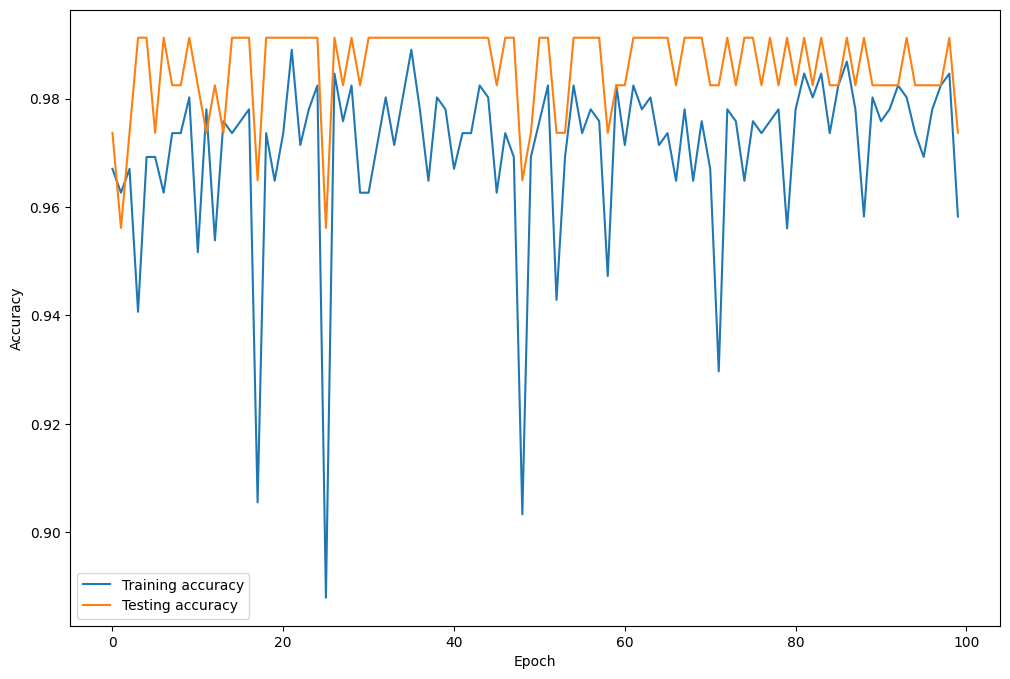

In [5]:
# Write your code here
#1
#train the perceptron classifier
perceptron = perceptron(X_train, Y_train, X_test, Y_test, 0.1, 100)
perceptron.train()
train_predictions = perceptron.predict(X_train)

#2
print('Test accuracy:', perceptron.accuracy(X_test, Y_test))

#3
plt.figure(figsize=(12, 8))
plt.plot(range(perceptron.epochs), perceptron.train_accuracies, label='Training accuracy')
plt.plot(range(perceptron.epochs), perceptron.test_accuracies, label='Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### 1.4 (2 points)
##### To-do

Train the Sklearn perceptron using the same training dataset and print the test accuracy score after training. You can use accuracy_score from sklearn to help you calculate. We have already imported the function in the first cell. 

Here is the documentation for the Sklearn perceptron. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

Make sure use the same parameters as you used in your perceptron. It is recommended to read through all of the parameters sklearn perceptron has. You might have to change some of the default values.

Sklearn perceptron accuracy should only differ from the accuracy of your perceptron by one or two percent. This difference comes from the random initialization of our weights and biases. 

In [6]:
# Write your code here

sklearn_perceptron = Perceptron(n_iter_no_change=1000, eta0=0.1, penalty=None, random_state=1)

sklearn_perceptron.fit(X_train, Y_train)


Y_pred_sklearn = sklearn_perceptron.predict(X_test)

print("Sklearn's Perceptron Accuracy:",accuracy_score(Y_test, Y_pred_sklearn))

Sklearn's Perceptron Accuracy: 0.9736842105263158


C:\Users\govinda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Part 2
In this section we will be training the our model on a 2 dimensional toy dataset. This way we can visualize its decision boundary. 

Below is the scatterplot of the dataset we will be classifying.

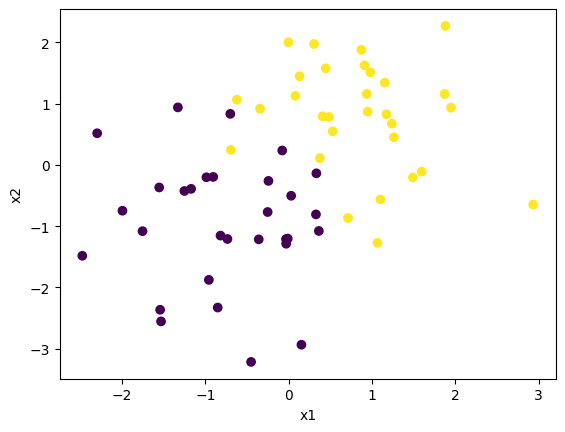

In [7]:
SIZE = 30
np.random.seed(seed=1)
toy_data_0 = np.random.multivariate_normal([-0.75, -0.75], cov=np.array([[1, 0.1],
                                                                         [0.1, 1]]), size=SIZE)
toy_data_1 = np.random.multivariate_normal([0.75, 0.75], cov=np.array([[1, 0],
                                                                       [0, 1]]), size=SIZE)
toy_data = np.vstack((toy_data_0, toy_data_1))
toy_labels = np.hstack((np.ones(SIZE)*-1, np.ones(SIZE)))
plt.scatter(toy_data[:, 0], toy_data[:, 1], c=toy_labels)
plt.xlabel('x1')
plt.ylabel('x2')
X_train, X_test, Y_train, Y_test = train_test_split(toy_data, toy_labels, test_size = 0.3, stratify= toy_labels, random_state = 123)

#### 2.1 (2 points)
##### To-do
1. First, return the weights and the bias prior to training. Store them in variable `w` and `b`.  (1 point)

In [10]:

our_clf= perceptron(X_train, Y_train,X_test,Y_test, 1E-4, 1000)
w = our_clf.w
b = our_clf.b

We denote the data sample (could be any datapoint) as $X = [x_{1},x_{2}] $, weights for our dataset as $w = [w_{1},w_{2}]$, and the bias as $b$.


#### To-do 
2. Complete the equation for the decision boundary in terms of $x_{1}, x_{2},w_{1},w_{2}$ and b. (1 point) (write it below)

Hint: derive the equation from the decision boundary equation in the part 1 introduction. Or try to understand the provided code. 
$$ x_{2} =............ $$  

$$ x_{2} =-(w_{1}/w_{2})*x_{1}+(b/w2)$$  
# do it in terms of varaible w,b

We can visual our initial decision boundary.

Text(0, 0.5, 'x2')

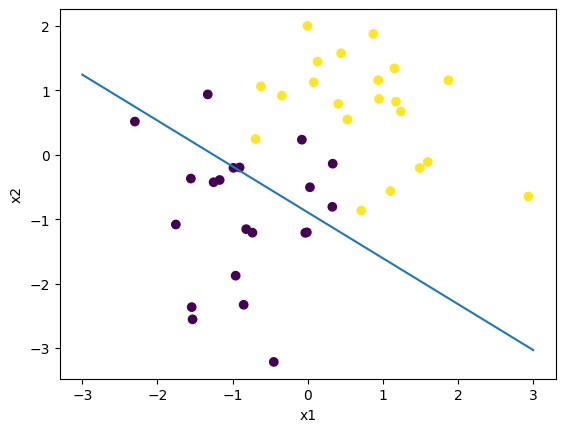

In [11]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
x= np.linspace(-3,3, 100)
x2= -(w[0]/w[1])*x - b/w[1]
plt.plot(x, x2)
plt.xlabel('x1')
plt.ylabel('x2')

#### 2.2 (3 points)

##### To-do 
1. Train your perceptron classifier on the dataset. (2 points)
2. Plot the decision boudary of the trained perceptron. (Feel free to use the provided code from the problem above.) (1 point)


Test accuracy: 0.4444444444444444


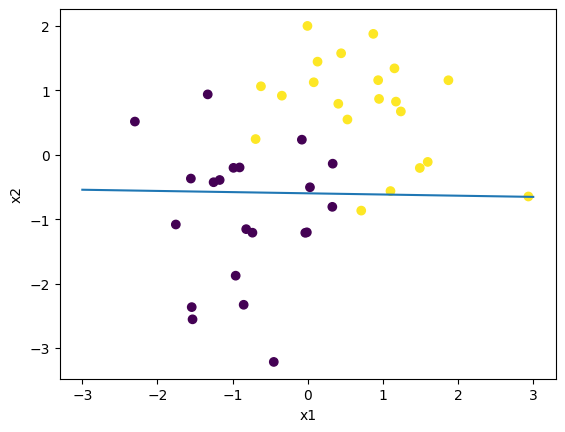

In [12]:
# Write down your code here
#our_clf.train()
#train_predictions = our_clf.predict(X_train)

#1

#train the perceptron classifier
our_clf= perceptron(X_train, Y_train, X_test, Y_test, 0.000005, 200)
w = our_clf.w
b = our_clf.b
our_clf.train()
train_predictions = our_clf.predict(X_train)

print('Test accuracy:', our_clf.accuracy(X_test, Y_test))

#2
# Plot the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)

x = np.linspace(-3, 3, 100)
x2 = -(w[0]/w[1])*x - b/w[1]

plt.plot(x, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### Part 3 

#### 3.1 (Breast cancer dataset) (2 points)
Logistic regression is another binary classification algorithm. 


##### To-do:
1. Train the Sklearn logistic regression using the breast cancer training dataset. (1 point)
2. Print the test accuracy score after training. (1 point)

Here is the documentation for the Sklearn logistic regression . 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

It is recommended to read through all of the parameters sklearn logistic regression has.

In [13]:
#1
from sklearn.linear_model import LogisticRegression
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data['class'] = breast_cancer.target
X = data.drop('class', axis = 1)
Y = data['class']

X = X.to_numpy(dtype = float)
Y = Y.to_numpy(dtype = float)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify= Y, random_state = 123)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
#2
print(f"Test accuracy score: {accuracy }")




Test accuracy score: 0.9590643274853801


C:\Users\govinda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3.2 (Toy dataset created in Part 2) (3 points)
##### To-do 
1. Train the logistic regression on the toy dataset. (1 point)
2. Print the weights and the bias after training. If you are not sure how to obtain them, Google would be a good resource. (1 point)
3. Plot the decision boundary. You can copy the code from problem 2.  (1 point)

Weights:  [[1.61375704 1.55619435]]
Bias:  [0.03694965]


C:\Users\govinda\AppData\Local\Temp\ipykernel_20236\2818512700.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy, 'k-', color="red")


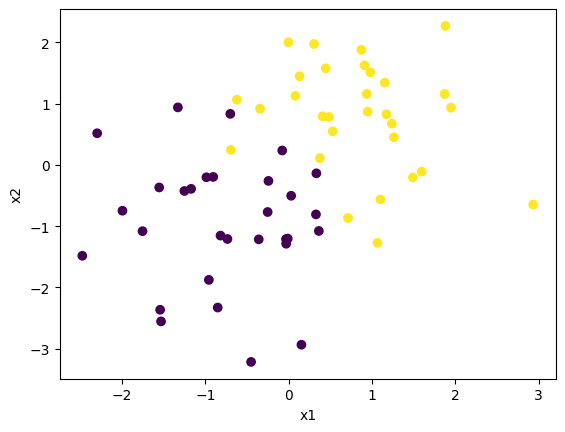

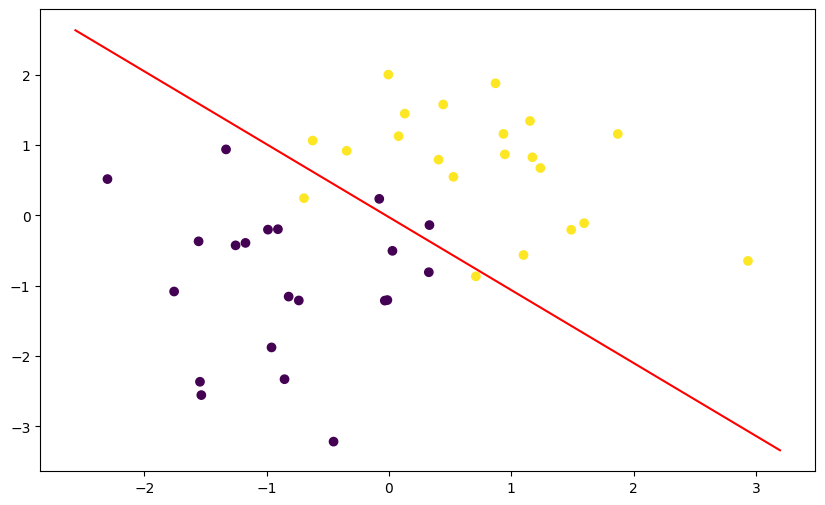

In [18]:
from sklearn.linear_model import LogisticRegression
#re load toy data
SIZE = 30
np.random.seed(seed=1)
toy_data_0 = np.random.multivariate_normal([-0.75, -0.75], cov=np.array([[1, 0.1],
                                                                         [0.1, 1]]), size=SIZE)
toy_data_1 = np.random.multivariate_normal([0.75, 0.75], cov=np.array([[1, 0],
                                                                       [0, 1]]), size=SIZE)
toy_data = np.vstack((toy_data_0, toy_data_1))
toy_labels = np.hstack((np.ones(SIZE)*-1, np.ones(SIZE)))
plt.scatter(toy_data[:, 0], toy_data[:, 1], c=toy_labels)
plt.xlabel('x1')
plt.ylabel('x2')
X_train, X_test, Y_train, Y_test = train_test_split(toy_data, toy_labels, test_size = 0.3, stratify= toy_labels, random_state = 123)





# Initialize the Logistic Regression model
logistic_reg = LogisticRegression(random_state=0)
logistic_reg.fit(X_train, Y_train)
#2
print("Weights: ", logistic_reg.coef_)
print("Bias: ", logistic_reg.intercept_)


#3
plt.figure(figsize=(10,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)

# Line plot for the decision boundary
xmin, xmax = plt.xlim()
w = logistic_reg.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (logistic_reg.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-', color="red")
plt.show()